In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

## **Data Cleaning**

In [2]:
# read the data

df = pd.read_excel('Coffee Shop Sales.xlsx')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [3]:
# check the data types of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [4]:
# check for missing values

missing_values = df.isna().sum()
duplicates = df[df.duplicated(subset='transaction_id')]

In [5]:
# Display missing values and a sample of the duplicates

print("Missing Values:\n", missing_values)
print("\nDuplicates:\n", duplicates.head())

Missing Values:
 transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

Duplicates:
 Empty DataFrame
Columns: [transaction_id, transaction_date, transaction_time, transaction_qty, store_id, store_location, product_id, unit_price, product_category, product_type, product_detail]
Index: []


In [6]:
# Convert 'transaction_date' to datetime if not already in the correct format

df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')

## **Feature Engineering**

In [7]:
# create separated columns for day, week, and month

df['day'] = df['transaction_date'].dt.day_name()
df['week'] = df['transaction_date'].dt.isocalendar().week
df['month'] = df['transaction_date'].dt.month_name()

df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,day,week,month
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,Sunday,52,January
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,52,January
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,Sunday,52,January
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,Sunday,52,January
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,52,January


In [8]:
# add hour column from the 'transaction_time' column

df["hour"] = df["transaction_time"].apply(lambda x : x.hour)
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,day,week,month,hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,Sunday,52,January,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,52,January,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,Sunday,52,January,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,Sunday,52,January,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,52,January,7


In [9]:
# add tota_price column by multiplying the transaction_qty and unit_price

df['total_price'] = df['transaction_qty'] * df['unit_price']
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,day,week,month,hour,total_price
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,Sunday,52,January,7,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,52,January,7,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,Sunday,52,January,7,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,Sunday,52,January,7,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,52,January,7,6.2


In [10]:
df.to_csv('coffee_shop_sales.csv', index=False)

## **EDA** 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  day               149116 non-null  object        
 12  week              149116 non-null  UInt32        
 13  month             149116 non-null  object        
 14  hour

In [12]:
numerical_cols = ['transaction_qty', 'unit_price', 'total_price']
stats_summary = df[numerical_cols].describe()
stats_summary

,transaction_qty,unit_price,total_price
count,149116.000000,149116.000000,149116.000000
mean,1.438276,3.382219,4.686367
std,0.542509,2.658723,4.227099
min,1.000000,0.800000,0.800000
25%,1.000000,2.500000,3.000000
50%,1.000000,3.000000,3.750000
75%,2.000000,3.750000,6.000000
max,8.000000,45.000000,360.000000


In [13]:
# daily sales

daily_sales = df.groupby('transaction_date').agg({
    'total_price': 'sum',
    'transaction_id': 'count'
}).reset_index()
daily_sales.columns = ['date', 'revenue', 'num_transactions']
daily_sales

,date,revenue,num_transactions
0,2023-01-01,2508.20,550
1,2023-01-02,2403.35,566
2,2023-01-03,2565.00,582
3,2023-01-04,2220.10,497
4,2023-01-05,2418.85,547
...,...,...,...
176,2023-06-26,5875.90,1195
177,2023-06-27,5975.65,1277
178,2023-06-28,4728.90,1070
179,2023-06-29,4450.75,1009


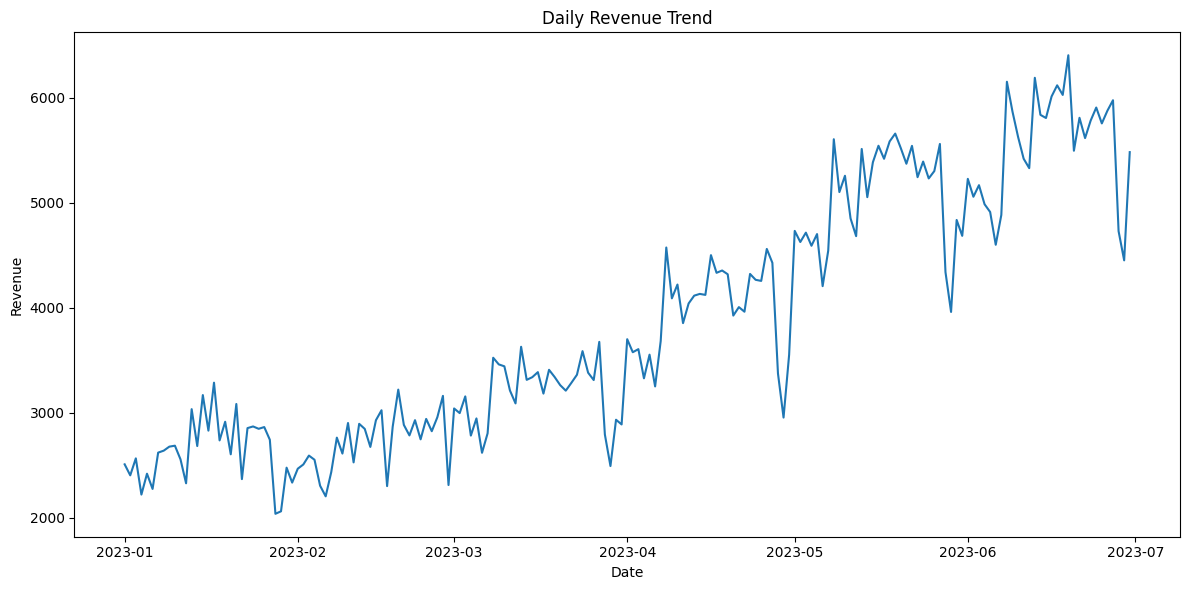

In [14]:
# daily sales plot

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['date'],
         daily_sales['revenue'])
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

In [15]:
total_revenue = daily_sales['revenue'].sum()
avg_daily_revenue = daily_sales['revenue'].mean()

print(f'Total Revenue: ${total_revenue:,.2f}')
print(f'Average Daily Revenue: ${avg_daily_revenue:.2f}')

Total Revenue: $698,812.33
Average Daily Revenue: $3860.84


In [16]:
# weekly sales

df['weekday'] = pd.to_datetime(df['transaction_date']).dt.day_name()
weekly_patterns = df.groupby('weekday').agg({
    'total_price': 'sum',
    'transaction_id': 'count'
}).reset_index()
weekly_patterns.columns = ['weekday', 'revenue', 'num_transactions']
weekly_patterns

,weekday,revenue,num_transactions
0,Friday,101373.00,21701
1,Monday,101677.28,21643
2,Saturday,96894.48,20510
3,Sunday,98330.31,21096
4,Thursday,100767.78,21654
5,Tuesday,99455.94,21202
6,Wednesday,100313.54,21310


In [17]:
# Define the correct order of weekdays
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'weekday' column to a categorical type with the specified order
weekly_patterns['weekday'] = pd.Categorical(weekly_patterns['weekday'], categories=weekdays_order, ordered=True)

# Sort the DataFrame by the 'weekday' column
weekly_patterns = weekly_patterns.sort_values('weekday').reset_index(drop=True)
weekly_patterns

,weekday,revenue,num_transactions
0,Monday,101677.28,21643
1,Tuesday,99455.94,21202
2,Wednesday,100313.54,21310
3,Thursday,100767.78,21654
4,Friday,101373.00,21701
5,Saturday,96894.48,20510
6,Sunday,98330.31,21096


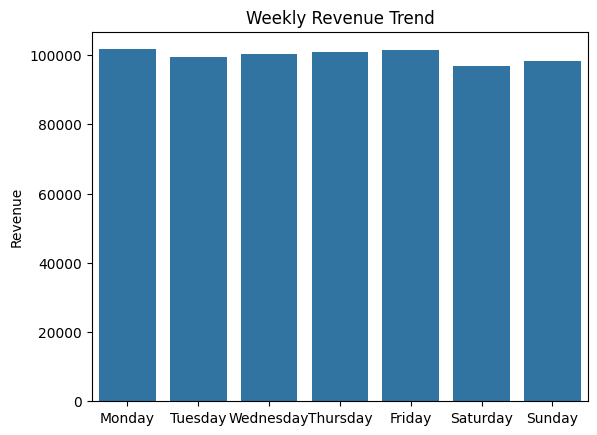

In [18]:
# weekly sales plot

sns.barplot(data=weekly_patterns, x='weekday', y='revenue')
plt.title('Weekly Revenue Trend')
plt.xlabel('')
plt.ylabel('Revenue')
plt.show()

In [19]:
# product analysis

product_analysis = df.groupby(['product_category', 'product_type']).agg({
    'total_price': 'sum',
    'transaction_id': 'count'
}).reset_index()
product_analysis.columns = ['category', 'type', 'revenue', 'num_transactions']
product_analysis = product_analysis.sort_values(by='revenue', ascending=False)
product_analysis


,category,type,revenue,num_transactions
5,Coffee,Barista Espresso,91406.20,16403
26,Tea,Brewed Chai tea,77081.95,17183
16,Drinking Chocolate,Hot chocolate,72416.00,11468
7,Coffee,Gourmet brewed coffee,70034.60,16912
25,Tea,Brewed Black tea,47932.00,11350
28,Tea,Brewed herbal tea,47539.50,11245
9,Coffee,Premium brewed coffee,38781.15,8135
8,Coffee,Organic brewed coffee,37746.50,8489
2,Bakery,Scone,36866.12,10173
6,Coffee,Drip coffee,31984.00,8477


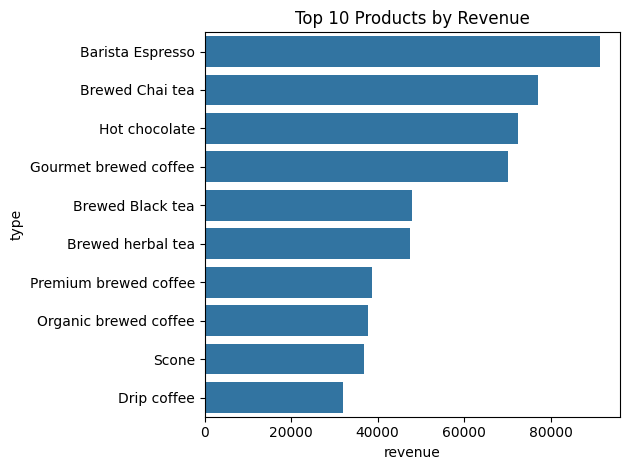

In [20]:
# top products by revenue

top_products = product_analysis.head(10)
sns.barplot(data=top_products, x='revenue', y='type')
plt.title('Top 10 Products by Revenue')
plt.tight_layout()
plt.show()

In [21]:
# hourly patterns

hourly_patterns = df.groupby('hour').agg({
    'total_price': 'sum',
    'transaction_id': 'count'
}).reset_index()
hourly_patterns.columns = ['hour', 'revenue', 'num_transactions']

hourly_patterns

,hour,revenue,num_transactions
0,6,21900.27,4594
1,7,63526.47,13428
2,8,82699.87,17654
3,9,85169.53,17764
4,10,88673.39,18545
5,11,46319.14,9766
6,12,40192.79,8708
7,13,40367.45,8714
8,14,41304.74,8933
9,15,41733.10,8979


Text(0.5, 1.0, 'Hourly Revenue Trend')

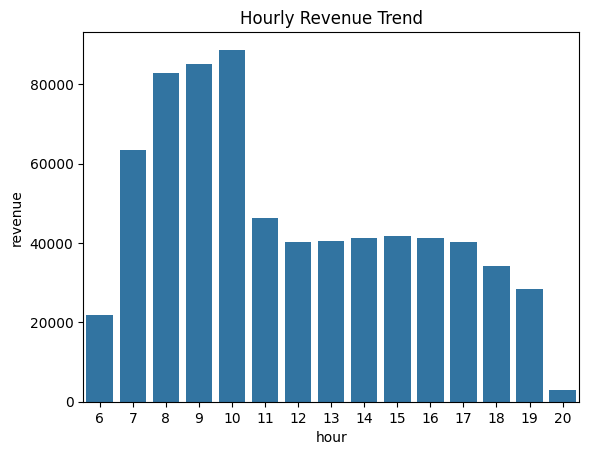

In [22]:
# hourly patterns plot

sns.barplot(data=hourly_patterns, x='hour', y='revenue')
plt.title('Hourly Revenue Trend')

In [23]:
store_analysis = df.groupby('store_location').agg({
    'total_price': 'sum',
    'transaction_id': 'count'
}).reset_index()
store_analysis.columns = ['store', 'revenue', 'num_transactions']
store_analysis

,store,revenue,num_transactions
0,Astoria,232243.91,50599
1,Hell's Kitchen,236511.17,50735
2,Lower Manhattan,230057.25,47782


In [24]:
# montly sales trend
monthly_sales = df.groupby('month')['total_price'].sum().reset_index()
monthly_sales = monthly_sales.sort_values('month', key=lambda x: pd.to_datetime(x, format='%B').dt.month)
monthly_sales

,month,total_price
2,January,81677.74
1,February,76145.19
4,March,98834.68
0,April,118941.08
5,May,156727.76
3,June,166485.88


In [25]:
# best selling products
best_selling_products = df.groupby('product_detail')['total_price'].sum().reset_index()
best_selling_products = best_selling_products.sort_values('total_price', ascending=False)
best_selling_products

,product_detail,total_price
75,Sustainably Grown Organic Lg,21151.75
20,Dark chocolate Lg,21006.00
48,Latte Rg,19112.25
6,Cappuccino Lg,17641.75
53,Morning Sunrise Chai Lg,17384.00
...,...,...
49,Lemon Grass,1360.40
36,Guatemalan Sustainably Grown,1340.00
70,Spicy Eye Opener Chai,1335.90
22,Earl Grey,1270.90


In [26]:
# best selling cateogries
best_selling_categories = df.groupby('product_category')['total_price'].sum().reset_index()
best_selling_categories = best_selling_categories.sort_values('total_price', ascending=False)
best_selling_categories

,product_category,total_price
2,Coffee,269952.45
8,Tea,196405.95
0,Bakery,82315.64
4,Drinking Chocolate,72416.00
3,Coffee beans,40085.25
1,Branded,13607.00
6,Loose Tea,11213.60
5,Flavours,8408.80
7,Packaged Chocolate,4407.64


In [27]:
distribution_stats = {
    col: {
        'skewness': stats.skew(df[col]),
        'kurtosis': stats.kurtosis(df[col])
    } for col in numerical_cols
}

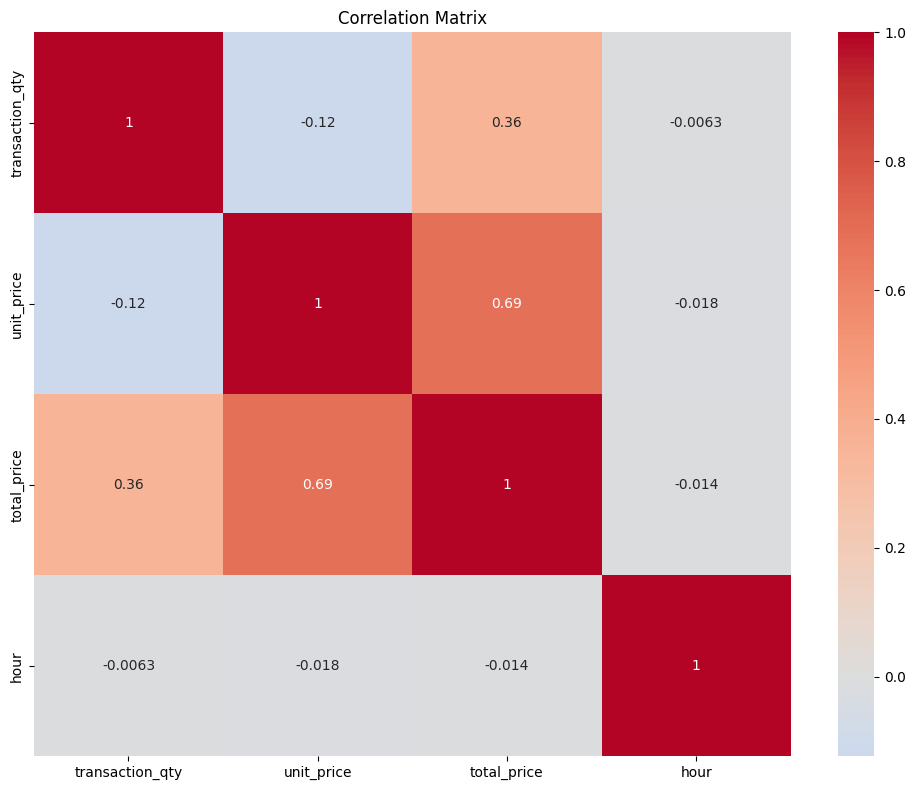

In [28]:
numerical_cols = ['transaction_qty', 'unit_price', 'total_price', 'hour']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## **Feature Engineering**

In [29]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,day,week,month,hour,total_price,weekday
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,Sunday,52,January,7,6.0,Sunday
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,52,January,7,6.2,Sunday
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,Sunday,52,January,7,9.0,Sunday
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,Sunday,52,January,7,2.0,Sunday
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,52,January,7,6.2,Sunday


Temporal Features

In [30]:
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday']).astype(int)

In [31]:
df['season'] = df['month'].map({
    'December': 'Winter',
    'January': 'Winter',
    'February': 'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'July': 'Summer',
    'August': 'Summer',
    'September': 'Fall',
    'October': 'Fall',
    'November': 'Fall'
})

In [32]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,day,week,month,hour,total_price,weekday,is_weekend,season
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,Sunday,52,January,7,6.0,Sunday,1,Winter
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,52,January,7,6.2,Sunday,1,Winter
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,Sunday,52,January,7,9.0,Sunday,1,Winter
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,Sunday,52,January,7,2.0,Sunday,1,Winter
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday,52,January,7,6.2,Sunday,1,Winter


Aggregate Sales Features

In [33]:
weekly_sales = df.groupby('week')['total_price'].sum().reset_index()
weekly_sales.rename(columns={'total_price': 'weekly_sales'}, inplace=True)
hourly_avg_sales = df.groupby('hour')['total_price'].mean().reset_index()
hourly_avg_sales.rename(columns={'total_price': 'hourly_avg_sales'}, inplace=True)

In [34]:
# merge aggregated features into the dataset
df = df.merge(weekly_sales, on='week', how='left')
df = df.merge(hourly_avg_sales, on='hour', how='left')

df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,...,day,week,month,hour,total_price,weekday,is_weekend,season,weekly_sales,hourly_avg_sales
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,...,Sunday,52,January,7,6.0,Sunday,1,Winter,2508.2,4.730896
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,...,Sunday,52,January,7,6.2,Sunday,1,Winter,2508.2,4.730896
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,...,Sunday,52,January,7,9.0,Sunday,1,Winter,2508.2,4.730896
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,...,Sunday,52,January,7,2.0,Sunday,1,Winter,2508.2,4.730896
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,...,Sunday,52,January,7,6.2,Sunday,1,Winter,2508.2,4.730896


In [35]:
# store level sales performance
store_sales = df.groupby('store_id')['total_price'].sum().reset_index()
store_sales.rename(columns={'total_price': 'store_total_sales'}, inplace=True)
df = df.merge(store_sales, on='store_id', how='left')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,...,week,month,hour,total_price,weekday,is_weekend,season,weekly_sales,hourly_avg_sales,store_total_sales
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,...,52,January,7,6.0,Sunday,1,Winter,2508.2,4.730896,230057.25
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,...,52,January,7,6.2,Sunday,1,Winter,2508.2,4.730896,230057.25
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,...,52,January,7,9.0,Sunday,1,Winter,2508.2,4.730896,230057.25
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,...,52,January,7,2.0,Sunday,1,Winter,2508.2,4.730896,230057.25
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,...,52,January,7,6.2,Sunday,1,Winter,2508.2,4.730896,230057.25


In [36]:
df['season'].value_counts()

season
Spring    80091
Summer    35352
Winter    33673
Name: count, dtype: int64

In [37]:
# encode categorical variables
df = pd.get_dummies(df, columns=['product_category', 'store_location', 'season'], drop_first=True)

In [38]:
df.drop(['transaction_id', 'transaction_date', 'transaction_time', 'product_detail', 'product_type', 'day', 'weekday', 'month'], axis=1, inplace=True)

In [39]:
df.head()

,transaction_qty,store_id,product_id,unit_price,week,hour,total_price,is_weekend,weekly_sales,hourly_avg_sales,...,product_category_Coffee beans,product_category_Drinking Chocolate,product_category_Flavours,product_category_Loose Tea,product_category_Packaged Chocolate,product_category_Tea,store_location_Hell's Kitchen,store_location_Lower Manhattan,season_Summer,season_Winter
0,2,5,32,3.0,52,7,6.0,1,2508.2,4.730896,...,False,False,False,False,False,False,False,True,False,True
1,2,5,57,3.1,52,7,6.2,1,2508.2,4.730896,...,False,False,False,False,False,True,False,True,False,True
2,2,5,59,4.5,52,7,9.0,1,2508.2,4.730896,...,False,True,False,False,False,False,False,True,False,True
3,1,5,22,2.0,52,7,2.0,1,2508.2,4.730896,...,False,False,False,False,False,False,False,True,False,True
4,2,5,57,3.1,52,7,6.2,1,2508.2,4.730896,...,False,False,False,False,False,True,False,True,False,True


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   transaction_qty                      149116 non-null  int64  
 1   store_id                             149116 non-null  int64  
 2   product_id                           149116 non-null  int64  
 3   unit_price                           149116 non-null  float64
 4   week                                 149116 non-null  UInt32 
 5   hour                                 149116 non-null  int64  
 6   total_price                          149116 non-null  float64
 7   is_weekend                           149116 non-null  int32  
 8   weekly_sales                         149116 non-null  float64
 9   hourly_avg_sales                     149116 non-null  float64
 10  store_total_sales                    149116 non-null  float64
 11  product_categ

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
X = df.drop(['total_price'], axis=1)
y = df['total_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# train a random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
y_pred = model.predict(X_test)

In [45]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

RMSE: 0.00
R2 Score: 1.00


In [49]:
corr_matrix = df.corr()
print(corr_matrix['total_price'].sort_values(ascending=False))


total_price                            1.000000
unit_price                             0.685550
product_category_Coffee beans          0.469090
transaction_qty                        0.356231
product_category_Branded               0.227101
product_category_Drinking Chocolate    0.111183
product_category_Loose Tea             0.098023
product_category_Packaged Chocolate    0.059099
store_location_Lower Manhattan         0.020852
hourly_avg_sales                       0.019621
weekly_sales                           0.008191
store_id                               0.004595
week                                   0.004378
season_Summer                          0.003034
is_weekend                             0.000862
season_Winter                          0.000072
store_location_Hell's Kitchen         -0.004191
store_total_sales                     -0.011116
product_category_Coffee               -0.012371
hour                                  -0.013783
product_category_Tea                  -0

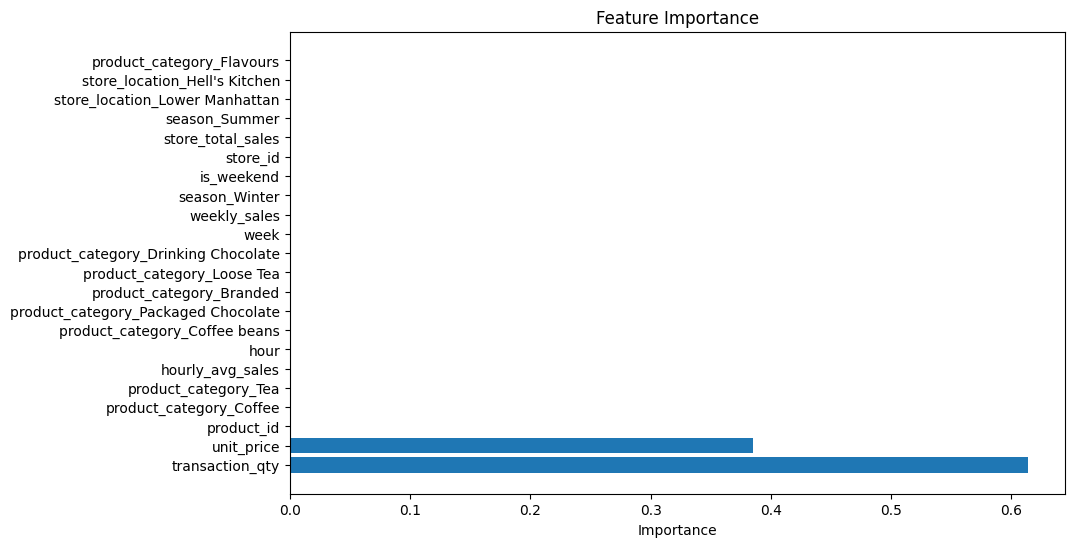

In [56]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to view the features with their importance scores
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [57]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Print the mean RMSE across folds
print("Mean RMSE from 5-fold cross-validation:", np.mean(-cv_scores))


Mean RMSE from 5-fold cross-validation: 0.05635966872129311


In [61]:
X.columns

Index(['transaction_qty', 'store_id', 'product_id', 'unit_price', 'week',
       'hour', 'is_weekend', 'weekly_sales', 'hourly_avg_sales',
       'store_total_sales', 'product_category_Branded',
       'product_category_Coffee', 'product_category_Coffee beans',
       'product_category_Drinking Chocolate', 'product_category_Flavours',
       'product_category_Loose Tea', 'product_category_Packaged Chocolate',
       'product_category_Tea', 'store_location_Hell's Kitchen',
       'store_location_Lower Manhattan', 'season_Summer', 'season_Winter'],
      dtype='object')

In [62]:
# Sample scenario 1: Predict sales on a weekend day
scenario_weekend = df.copy()
scenario_weekend['is_weekend'] = 1  # Set weekend flag

# Sample scenario 2: Predict sales on a weekday
scenario_weekday = df.copy()
scenario_weekday['is_weekend'] = 0  # Set weekday flag

# Sample scenario 3: Predict sales during Summer
scenario_summer = df.copy()
scenario_summer['season_Summer'] = 1  # Set Summer season flag
scenario_summer['season_Winter'] = 0  # Set Winter season flag

# Sample scenario 4: Predict sales at 'Hell's Kitchen' location
scenario_hells_kitchen = df.copy()
scenario_hells_kitchen['store_location_Hell\'s Kitchen'] = 1  # Set Hell's Kitchen location flag
scenario_hells_kitchen['store_location_Lower Manhattan'] = 0  # Set other location flag

# Now we can use the model to predict for these different scenarios
scenarios = [scenario_weekend, scenario_weekday, scenario_summer, scenario_hells_kitchen]
scenario_names = ['Weekend Sales', 'Weekday Sales', 'Summer Sales', 'Hell\'s Kitchen Sales']

# Predict sales for each scenario
predictions = []
for i, scenario in enumerate(scenarios):
    prediction = model.predict(scenario[X.columns])  # Assuming 'feature_columns' is the list of features used in the model
    predictions.append((scenario_names[i], np.mean(prediction)))

# Display the scenario results
for scenario_name, pred in predictions:
    print(f'{scenario_name}: Predicted average sales = {pred:.2f}')


Weekend Sales: Predicted average sales = 4.69
Weekday Sales: Predicted average sales = 4.69
Summer Sales: Predicted average sales = 4.69
Hell's Kitchen Sales: Predicted average sales = 4.69


In [64]:
import joblib
joblib.dump(model, 'model_reg.pkl')


['model_reg.pkl']